# FDS Final Project
Ima drop some template here for easy implementation

In [1]:
import pandas as pd
import numpy as np

import pickle
import time

# surpess warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [17]:
# Dataset 1 from Huffington Post
huffpost = pd.read_json('data/huff_post.json', lines=True).dropna().reset_index()
huffpost = huffpost[['short_description', 'category']]
huffpost.columns = ['text', 'label']
huffpost.head(1)

,text,label
0,Health experts said it is too early to predict...,U.S. NEWS


In [16]:
# Dataset 2 from Bancolombia
bancolombia = pd.read_csv('data/bancolombia.csv').dropna().reset_index()
bancolombia = bancolombia[['news', 'Type']]
bancolombia.columns = ['text', 'label']
bancolombia.head(1)

,text,label
0,Durante el foro La banca articulador empresari...,Otra


In [5]:
# Dataset 3 from Folha de Sao Paulo
folha = pd.read_csv('data/folha.csv').dropna().reset_index()
folha = folha[['text', 'category']]
folha.columns = ['text', 'label']
folha.head(1)

,text,label
0,DA BBC BRASIL O trimestre de maio a julho des...,sobretudo


In [6]:
# Dataset 4 from BBC, no null values
bbc = pd.read_csv('data/bbc.csv').dropna().reset_index()
bbc = bbc[['content', 'category']]
bbc.columns = ['text', 'label']
bbc.head(1)

,text,label
0,Quarterly profits at US media giant TimeWarner...,business


In [7]:
# Dataset 4 from NOS, no null values
nos = pd.read_csv('data/nos.csv').dropna().reset_index()
nos = nos[['content', 'category']]
nos.columns = ['text', 'label']
nos.head(1)

,text,label
0,De enige kerncentrale van Litouwen is oudjaars...,Buitenland


In [8]:
# Dataset 5 from Geeks4Geeks, no null values
geeks4geeks = pd.read_csv('data/geeks4geeks.csv').dropna().reset_index()
geeks4geeks = geeks4geeks[['title', 'category']]
geeks4geeks.columns = ['text', 'label']
geeks4geeks.head(1)

,text,label
0,5 Best Practices For Writing SQL Joins,easy


In [20]:
# Now we put the datasets in a list
datasets = [huffpost, bancolombia, folha, bbc, nos, geeks4geeks]
dataset_names = ['huffpost', 'bancolombia', 'folha', 'bbc', 'nos', 'geeks4geeks']
dataset_names = ['Huffington Post', 'Bancolombia', 'Folha de Sao Paolo', 'BBC', 'NOS', 'Geeks4Geeks']

In [13]:
# we will import Naive Bayes, softmax classifier, and svm
from sklearn.naive_bayes import MultinomialNB

In [36]:
# we will import CountVectorizer to vectorize our text
from sklearn.feature_extraction.text import CountVectorizer

# we will import train_test_split to split our data
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

In [27]:
# 
def get_data(df, info, type, lang = None, min_df=1, max_df=1.0, ng_range=(1, 1), ret_only_X = False): # name of info , type column, language as in stopwords_files
    
    stopwords = lang
    if stopwords != None:
        with open(f'stopwords/{lang}', 'rb') as f:
            stopwords = pickle.load(f)
        
    vectorizer = CountVectorizer(min_df=min_df, stop_words=stopwords, max_df=max_df, ngram_range=ng_range)
    X = vectorizer.fit_transform(df[f'{info}'])
    if ret_only_X:
        return X

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, df[f'{type}'], test_size=0.2, random_state=42)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    return X_train, X_test, y_train, y_test, vectorizer, X

In [16]:
'''
losses = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error']

def plot_perf(classif_perf):
    fig, ax = plt.subplots(1,3, figsize=(12,4))
    for i,n in enumerate(['t', 'train_acc', 'test_acc']):  
        ax[i].plot(np.arange(1, 9, 1), classif_perf[:,:,i], label = losses)
        ax[i].set_title(n)
        ax[i].legend()#bbox_to_anchor=(1,1), loc='upper left')
    fig.tight_layout()
'''

'''
def score_single_clf(classifiers, i, data):
    X_train, X_test, y_train, y_test = data
    clf = classifiers[i]

    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print(f'Classifier:\t\t {classifier_names[i]}')
    print(f'Training time:\t\t {end - start:.3f} seconds')
    print(f'Training data accuracy:\t {clf.score(X_train, y_train):.3f}')
    print(f'Test data accuracy:\t {clf.score(X_test, y_test):.3f}')
    print()
'''

In [86]:
X_train, X_test, y_train, y_test, vectorizer, X = get_data(geeks4geeks, 'text', 'label', 'english', ret_only_X = False)

clfnb = MultinomialNB()

start = time.time()
clfnb.fit(X_train, y_train)
end = time.time()

out = [round(end - start, 3), round(clfnb.score(X_train, y_train), 3), round(clfnb.score(X_test, y_test), 3)]

In [87]:
'''
def clf_diff_parms(classifiers, data):
    X_train, X_test, y_train, y_test = data
    
    losses = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error']
    classif_perf = np.zeros((8, 6, 3))
    
    for j in range(len(losses)):
        for i in np.arange(1,9,1):
            clf = SGDClassifier(loss = losses[j], alpha=i*0.0001)

            start = time.time()
            clf.fit(X_train, y_train)
            end = time.time()

            classif_perf[i-1, j] = [round(end - start, 3), round(clf.score(X_train, y_train), 3), round(clf.score(X_test, y_test), 3)]
    return classif_perf
'''


"\ndef clf_diff_parms(classifiers, data):\n    X_train, X_test, y_train, y_test = data\n    \n    losses = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error']\n    classif_perf = np.zeros((8, 6, 3))\n    \n    for j in range(len(losses)):\n        for i in np.arange(1,9,1):\n            clf = SGDClassifier(loss = losses[j], alpha=i*0.0001)\n\n            start = time.time()\n            clf.fit(X_train, y_train)\n            end = time.time()\n\n            classif_perf[i-1, j] = [round(end - start, 3), round(clf.score(X_train, y_train), 3), round(clf.score(X_test, y_test), 3)]\n    return classif_perf\n"

In [88]:
nb_words = {}
ids = [j for j in clfnb.feature_log_prob_.argsort(axis = 1)[:, -10:]]
for i, name in enumerate(clfnb.classes_):
    words = [vectorizer.get_feature_names()[j] for j in ids[i]]
    nb_words[name] = words

In [122]:
import networkx as nx

n = nx.Graph()
n.add_nodes_from(list(nb_words.keys())) # adding classes names
n_classes = len(n.nodes())
nx.set_node_attributes(n, 'class', 'type') # setting attribute type as class


main_w = set([w for l in list(nb_words.values()) for w in l]) # set of list(most freq words)
# from 420 to 416

word_freq = np.array(X.sum(axis = 0)) 
words_sum = X.sum() 
main_w_freq_id = [vectorizer.vocabulary_[w] for w in list(main_w)] # get index
main_w_freq = [word_freq[0][i] for i in main_w_freq_id] # get freq of most freq words

d_f_nodes = [(list(main_w)[i], {'type' : 'words', 'freq' : main_w_freq[i]}) for i in range(len(main_w))] # df containing text words with freq attribute
n.add_nodes_from(d_f_nodes)

In [123]:
# it isn't actually word freq, but count, other scaling didn't work with dot size

In [124]:
edges = [(key, el) for key in list(nb_words.keys()) for el in nb_words[key]]
n.add_edges_from(edges)

In [125]:
node_type = nx.get_node_attributes(n, 'type')
node_freq = nx.get_node_attributes(n, 'freq')

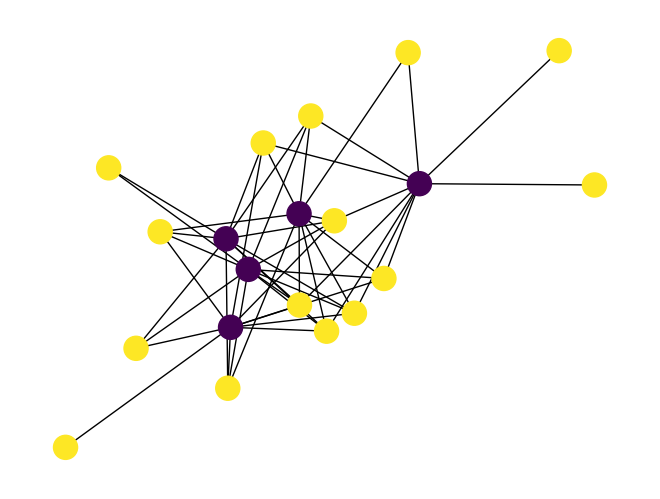

In [127]:
# plotting with nx
le = LabelEncoder()
nx.draw(n, node_color=le.fit_transform(list(node_type.values()) ) )

In [169]:
import plotly.graph_objects as go

In [190]:

pos = nx.spring_layout(n) # some formula calc positional layout i guess most ideal for plotting
nx.set_node_attributes(n, pos, name = 'pos')

edge_x = []
edge_y = []
for edge in n.edges():
    x0, y0 = n.nodes[edge[0]]['pos']
    x1, y1 = n.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in n.nodes():
    x, y = n.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Blackbody',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Word Count',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [182]:
# these first size values are for plotting

m = np.array([20 for i in range(n_classes)]) # setting const freq for class words
w = np.power(np.array(list(node_freq.values()))/14369*1 , -1)*3 # inverse word freq and some scaling for how distinct word is for class
sizes = np.concatenate((m,w), axis = 0) 

# these are the actual frequencies of the terms
freq = [1 for i in range(n_classes)]+(list(node_freq.values()))

In [191]:
le = LabelEncoder()
#node_trace.marker.color = le.fit_transform(list(node_type.values()))
node_trace.marker.color = freq
node_trace.marker.size =  sizes

hoverinfo = []
nnames = list(n.nodes())
for node, adjacencies in enumerate(n.adjacency()):
    hoverinfo.append(str(nnames[node]) + ' \n Term Count: '+ str(freq[node]) + ' \n # of connections: '+str(len(adjacencies[1])))

#node_trace.text = hoverinfo
node_trace.text = list(n.nodes())

In [192]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Word Net',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()
